1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

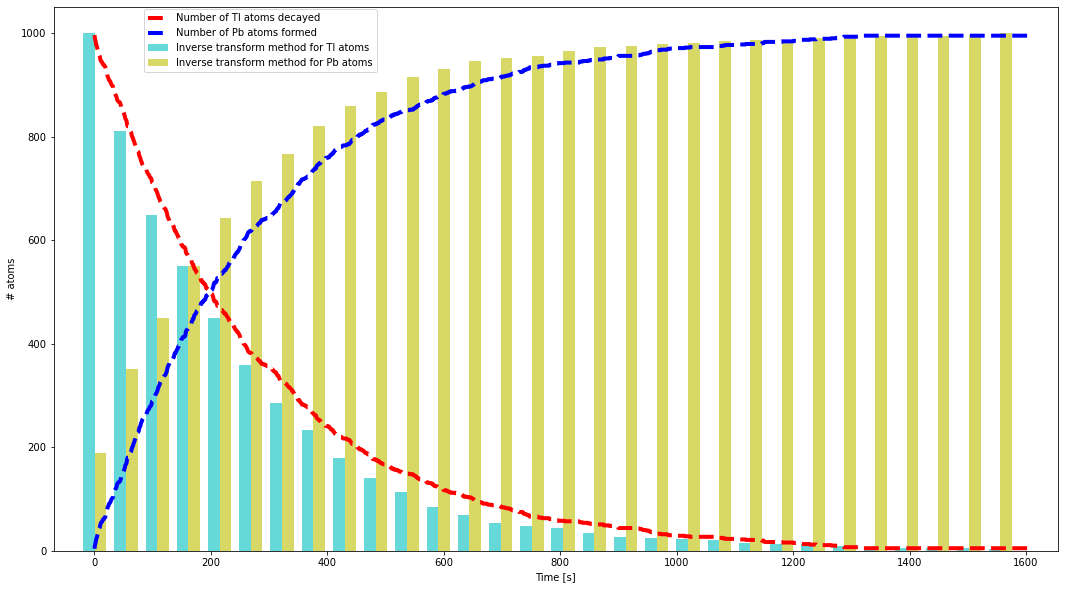

In [155]:
np.random.seed(123)

starting_Tl = 1000
starting_Pb = 0
tau_s = 3.052*60
time_steps = np.arange(0, 1610, 1)

def p(t): 
    tau_h = 3.052*60 
    return 1 - 2**(-t/tau_s)

def inverse(z):
    return -np.log(1 - z)*tau_s/(np.log(2))

Tl_dec = []
Pb_dec = []
Tl_inv_dec = []

for i in time_steps:
    for j in range(0, starting_Tl, 1):
        if np.random.uniform(0,1) < p(1):
            starting_Tl -= 1     
            starting_Pb += 1
    Tl_dec.append(starting_Tl)        
    Pb_dec.append(starting_Pb)

hist_inv_Tl = inverse(np.random.uniform(0, 1, 1000))

counts1, bins1, _ = plt.hist(hist_inv_Tl, cumulative = -1 , bins = 30, visible = False)
counts2, bins2, _ = plt.hist(hist_inv_Tl, cumulative = 1, bins = 30, visible = False)
plt.close()

fig, axes = plt.subplots(1, figsize = (18, 10))

axes.plot(time_steps, Tl_dec, label = "Number of Tl atoms decayed", c = "r", lw = 4, linestyle = "--")
axes.plot(time_steps, Pb_dec, label = "Number of Pb atoms formed", c = "b", lw = 4, linestyle = "--")
axes.set(xlabel = "Time [s]", ylabel = "# atoms")
axes.bar(bins1[:30]-10, counts1, width = 20, color = "c", label = "Inverse transform method for Tl atoms", alpha = 0.6)
axes.bar(bins1[:30]+10, counts2, width = 20, color =  "y", label = "Inverse transform method for Pb atoms", alpha = 0.6)
axes.set_xlim(-70, 1655)
axes.legend(loc = (0.09, 0.88))

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

Number of bounced back particles: 1483
Percentage of bounced back particles: 0.148%


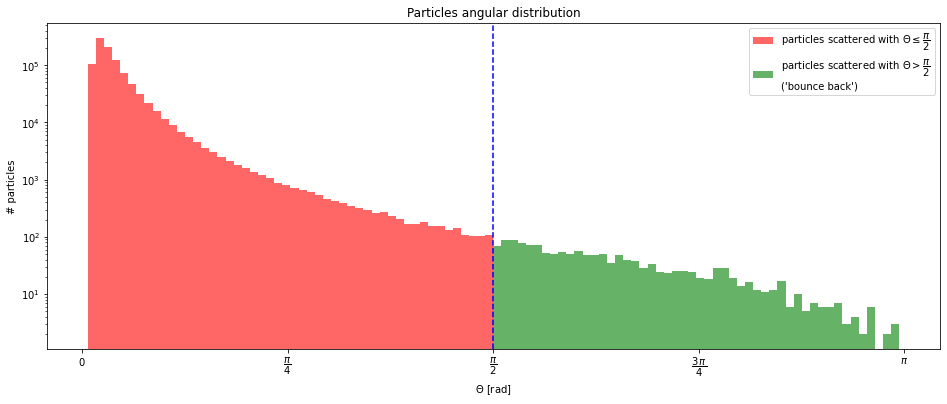

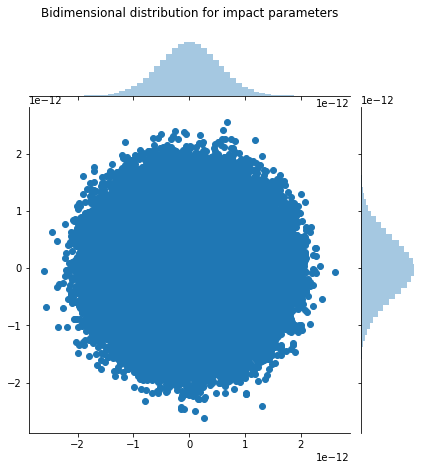

In [152]:
np.random.seed(127)

N, Z, e_, alpha, eps_0 = 10**6, 79, 1.6022*10**(-19), 5.2918*10**(-11), 8.8542*10**(-12)
E = 7.7*10**(6)*e_
sigma = alpha/100

b_x = np.random.normal(0, alpha/100, N) 
b_y = np.random.normal(0, alpha/100, N)
b = np.sqrt(b_x**2+b_y**2)

theta = 2*np.arctan((Z*e_**2)/(2*np.pi*eps_0*E*b))
mask = theta[theta > np.pi/2]

fig, axes = plt.subplots(1, 1, figsize = (16, 6))
axes.hist(theta[theta<=np.pi/2], bins = 50, color = "r", alpha = 0.6, label = "particles scattered with $\Theta\leq\dfrac{\pi}{2}$")
axes.hist(mask, bins = 50, color = "g", alpha = 0.6, label = "particles scattered with $\Theta > \dfrac{\pi}{2}$\n('bounce back')")
axes.axvline(np.pi/2, c = "b", linestyle = "--")
axes.set_yscale("log")
axes.set(title = "Particles angular distribution", xlabel = "$\Theta$ [rad]", ylabel = "# particles", xticks = np.arange(0, np.pi+0.5, np.pi/4), xticklabels = ['$0$', '$\dfrac{\pi}{4}$', '$\dfrac{\pi}{2}$', '$\dfrac{3\,\pi}{4}$', '$\pi$'])
axes.legend()

sns.jointplot(b_x, b_y, kind = 'scatter')
plt.suptitle("Bidimensional distribution for impact parameters", x = 0.45, y = 1.05)

print(f"Number of bounced back particles: {len(mask)}\nPercentage of bounced back particles: {np.round(len(mask)/len(theta)*100, 3)}%")

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Hit/miss method:
Integral = 1.4495 +/- 0.0028

Mean value method:
Integral = 1.4508 +/- 0.0053


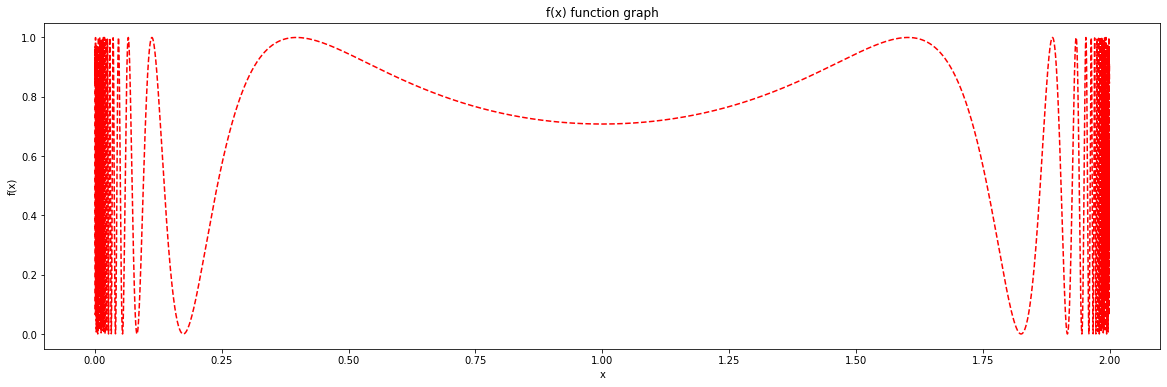

In [136]:
np.random.seed(123)

def f(x):
    return (np.sin(1/(x*(2-x))))**2
a = 0
b = 2

x = np.linspace(0.0001,1.9999,10000)

fig = plt.figure(figsize = (20, 6))
plt.plot(x, f(x), "r--")
plt.title("f(x) function graph")
plt.xlabel("x")
plt.ylabel("f(x)")

N = 100000
x_ran = np.random.uniform(0,2,N)
y_ran = np.random.uniform(0,1,N)
count = 0

for i in range(N):
    if (y_ran[i] < f(x_ran[i])):
        count += 1
        
#hit/miss method
        
A_hit = (b-a)*count/N
err_hit = ((b-a)/(N**(1/2)))*((count/N)*(1-count/N))**(1/2)

# mean value method

A_mean = (b-a)*np.sum(f(x))/x.size
err_mean = (b-a)*np.std(f(x))/x.size**(1/2)

print(f"Hit/miss method:\nIntegral = {np.round(A_hit, 4)} +/- {np.round(err_hit, 4)}"f"\n\nMean value method:\nIntegral = {np.round(A_mean, 4)} +/- {np.round(err_mean, 4)}")

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [132]:
N = 1000000

dim_2D = 2
dim_10D = 10


def f(x,y):
    if (x**2 + y**2 <= 1):
        return 1
    else:
        return 0
    
def f_10D(x):
    a = 0
    for r in x:
        a += r**2
    if a <= 1:
        return 1
    else:
        return 0

x, y = np.random.uniform(-1, 1, N), np.random.uniform(-1, 1, N)
points_2D = []

z = np.random.uniform(-1,1,size = (N,10)) 
points_10D = []

for i, j in zip(x, y):
    points_2D.append(f(i,j))
    
for k in z:
    points_10D.append(f_10D(k))

print('Unit circle area:', np.round(2**dim_2D/N * np.sum(points_2D), 3), "\n\n10D sphere area: ", np.round(2**dim_10D/N*np.sum(points_10D), 3))

Unit circle area: 3.139 

10D sphere area:  2.579


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

Integral evaluation: 0.8375428337335159


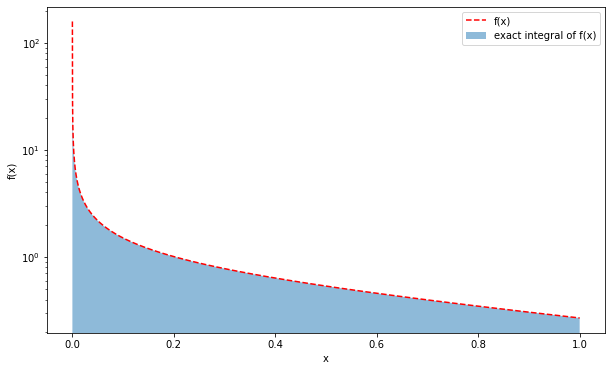

In [138]:
a = 0.00001
b = 1

x = np.linspace(a, b, 10000)

def f(x):
    return x**(-1/2)/(np.exp(x)+1)

def w(x):
    return 1/x**(1/2)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.plot(x, f(x), "r--", label = ("f(x)"))
ax.set_yscale("log")
ax.fill_between(x, f(x), 0, label = ("exact integral of f(x)"), alpha = 0.5)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()


i = np.random.uniform(0, 1, x.size)**2
I = 2*(f(i)/w(i)).sum()/x.size
print(f"Integral evaluation: {I}")